### Load Packages

In [1]:
# TODO: add annotations describing usage of different modules

from operator import mod
from os import getcwd
from os.path import exists, join

import joblib
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
import pandas as pd
import numpy as np
# from ydata_profiling import ProfileReport

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
import warnings
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
# import xgboost as xgb
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import recall_score

from sklearn import tree
from sklearn.decomposition import PCA, SparsePCA

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import json
import pickle
from IPython.display import Image
import warnings

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

import altair as alt
import random
import warnings

warnings.filterwarnings('ignore')

# set seaborn whitegrid theme
sns.set(style="whitegrid")

from sklearn.inspection import permutation_importance

/Users/orencarmeli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Load Data

In [2]:
cdc_survey = pd.read_csv('../data/cdc_nhanes_survey_responses_clean.csv')
print(cdc_survey.shape)

# filter to pregnant moms
cdc_survey_pmom = cdc_survey[cdc_survey['has_been_pregnant'] == 1]
print(cdc_survey_pmom.shape)

(35706, 863)
(7741, 863)


In [22]:
cdc_survey_pmom['weight_lbs_over_height_in_ratio'] = cdc_survey_pmom['weight_lbs'] / cdc_survey_pmom['height_in']
#cdc_survey_pmom['weight_lbs_over_height_in_ratio']

8        2.966667
11       2.460317
12       2.312500
15       2.174603
18       2.203390
           ...   
29140    2.390625
29141    2.461538
29144    3.032787
29146         NaN
29147    2.500000
Name: weight_lbs_over_height_in_ratio, Length: 7741, dtype: float64

### Candidate Features

Here we list out all candidate features for our model. 

In [23]:
# Depression screener
dep_screener_cols = [
    'little_interest_in_doing_things',
    'feeling_down_depressed_hopeless',
    'trouble_falling_or_staying_asleep',
    'feeling_tired_or_having_little_energy',
    'poor_appetitie_or_overeating',
    'feeling_bad_about_yourself',
    'trouble_concentrating',
    'moving_or_speaking_to_slowly_or_fast',
    'thoughts_you_would_be_better_off_dead',
    'difficult_doing_daytoday_tasks'
]

# Alcohol & smoking
alcohol_n_smoking_cols = [
    'has_smoked_tabacco_last_5days',
    'alcoholic_drinks_past_12mo', 
    'drank_alc',
    'alc_drinking_freq',
    'alc_per_day',
    'times_with_4or5_alc',
    'times_with_8plus_alc',
    'times_with_12plus_alc',
    '4plus_alc_daily',
    'days_4plus_drinks_occasion',
    'smoked_100_cigs',
    'currently_smoke'
]

#Medical Conditions 
med_condition_cols = [
    'chest_discomfort',
    'asthma',
    'anemia_treatment',
    'blood_transfusion',
    'arthritis',
    'heart_failure',
    'coronary_heart_disease',
    'angina_pectoris',
    'heart_attack',
    'stroke',
    'thyroid_issues',
    'respiratory_issues',
    'abdominal_pain',
    'gallstones',
    'gallbladder_surgery',
    'cancer',
    'dr_recommend_lose_weight',
    'dr_recommend_exercise',
    'dr_recommend_reduce_salt',
    'dr_recommend_reduce_fat',
    'currently_losing_weight',
    'currently_increase_exercise',
    'currently_reducing_salt',
    'currently_reducing_fat',
    'metal_objects',
    'has_diabetes',    
    #Blood Pressure & Cholesterol 
    'high_bp',
    'age_hypertension',
    'hypertension_prescription',
    'high_bp_prescription',
    'high_cholesterol',
    'cholesterol_prescription',
    # general health
    'has_overweight_diagnosis',   
    'height_in',
    'weight_lbs', 
    'weight_lbs_over_height_in_ratio',
    'general_health_condition',      
]

# diet, nutrition, & exercise 
lifestyle_cols = [
    # exercise/weight loss
    'vigorous_work',
    'walk_or_bicycle',
    'vigorous_recreation',
    'moderate_recreation',    
    'count_days_moderate_recreational_activity',   
    'count_minutes_moderate_recreational_activity',
    'count_minutes_moderate_sedentary_activity',    
    'count_lost_10plus_pounds',
    'has_tried_to_lose_weight_12mo', 
    'attempt_weight_loss_1yr',           
    # diet
    'how_healthy_is_your_diet',    
    'milk_consumption_freq',
    'govmnt_meal_delivery',
    'nonhomemade_meals',
    'fastfood_meals',
    'readytoeat_meals',
    'frozen_pizza'   
]

# Reproductive Health 
reproductive_health_cols = [
    'regular_periods',
    'age_last_period',
    'try_pregnancy_1yr',
    'see_dr_fertility',
    'pelvic_infection',
    'pregnant_now',
    'pregnancy_count',
    'diabetes_pregnancy',
    'delivery_count',
    'live_birth_count',
    'age_at_first_birth',
    'age_at_last_birth',
    'months_since_birth',
    'horomones_not_bc'
]

# socioeconomic status
socioeconomic_cols = [
    #Food Security
    'emergency_food_received',
    'food_stamps_used',
    #Hospital Utilization & Access to Care
    'general_health',
    'regular_healthcare_place',
    'time_since_last_healthcare',
    'overnight_in_hospital',
    'seen_mental_health_professional',
    'count_days_seen_doctor_12mo',
    'duration_last_healthcare_visit',       
    #Health Insurance
    'have_health_insurance',
    'have_private_insurance',
    'plan_cover_prescriptions',   
    #Income
    'family_poverty_level',
    'family_poverty_level_category',
    #Occupation
    'hours_worked',
    'over_35_hrs_worked',
    'work_schedule'    
]

demographic_cols = [
    'food_security_level_household',   
    'food_security_level_adult',    
    'monthly_poverty_index_category',
    'monthly_poverty_index',
    'count_hours_worked_last_week',
    'age_in_years',   
    'education_level',
    'is_usa_born',    
    'has_health_insurance',
    'has_health_insurance_gap'   
]

# combine all candidate features
candidate_features = dep_screener_cols + \
    alcohol_n_smoking_cols + \
    med_condition_cols + \
    lifestyle_cols + \
    socioeconomic_cols + \
    reproductive_health_cols + \
    demographic_cols


len(candidate_features)

117

# EDA

### # of nulls by columns

In [42]:
pd.set_option('display.max_rows', 1000)
#pd.reset_option('^display.', silent=True)

In [67]:
null_value_tot = pd.DataFrame(
    cdc_survey_pmom[candidate_features].isna().sum())\
    .rename(columns={0:'num_nulls'}
).reset_index()
null_value_tot = null_value_tot.sort_values(by = 'num_nulls',ascending=False)
null_value_tot['pct_null'] = null_value_tot['num_nulls'] / cdc_survey_pmom.shape[0]
null_value_tot.rename(columns={'index':'feature'},inplace=True)
null_value_tot

,feature,num_nulls,pct_null
17,times_with_12plus_alc,7582,0.979460
84,duration_last_healthcare_visit,7406,0.956724
80,time_since_last_healthcare,7406,0.956724
105,months_since_birth,7180,0.927529
16,times_with_8plus_alc,6973,0.900788
83,count_days_seen_doctor_12mo,6858,0.885932
91,over_35_hrs_worked,6491,0.838522
86,have_private_insurance,6077,0.785041
92,work_schedule,6025,0.778323
64,count_minutes_moderate_recreational_activity,5664,0.731688


In [48]:
null_value_tot[null_value_tot['pct_of_responses_null'] > 0.5].shape

(38, 3)

In [26]:
null_value_tot[null_value_tot['feature'] == "weight_lbs_over_height_in_ratio"]

,feature,num_nulls,pct_of_responses_null
57,weight_lbs_over_height_in_ratio,302,0.039013


<Axes: xlabel='pct_of_responses_null', ylabel='Count'>

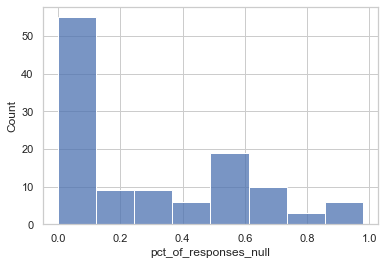

In [25]:
sns.histplot(null_value_tot['pct_of_responses_null'])

## EDA on features

better understand features & how target looks across ones

In [68]:
def univariate_analysis(
    df_to_use = cdc_survey_pmom,
    columns = dep_screener_cols,
    target_col = 'MDD'):
    
    column_values = pd.DataFrame(columns = ['col_value','pct_target','num_responses','feature'])
    column_summary = pd.DataFrame(columns=['feature','corr','corr_abs','std','min','max','unique_values','target','max_minus_min'])

    # MDD coverage by feature
    for col in columns:

        # calc mean pct for target column by indicator variable
        univariate = df_to_use.groupby(col) \
               .agg({target_col:'mean', 'SEQN':'count'}) \
               .reset_index() \
               .rename(columns={col:'col_value',target_col:'pct_target','SEQN':'num_responses'})

        print(f"\n{col}\n")
        print(univariate)
        
        # aggregate into summary table
        column_traits = pd.DataFrame({
            'feature':[col],
            'corr':[cdc_survey_pmom[['MDD',col]].corr().iloc[1,0]],
            'corr_abs':[abs(cdc_survey_pmom[['MDD',col]].corr().iloc[1,0])],            
            'std':[univariate[univariate['num_responses'] >= 30]['pct_target'].std()],
            'min':[univariate[univariate['num_responses'] >= 30]['pct_target'].min()],
            'max':[univariate[univariate['num_responses'] >= 30]['pct_target'].max()],
            'unique_values':[univariate[univariate['num_responses'] >= 30].shape[0]],
            'target':[target_col]
        })
        column_traits['max_minus_min'] = column_traits['max'] - column_traits['min']
        column_summary = pd.concat([column_summary,column_traits])
        
        # univariate data
        univariate['feature'] = col
        column_values = pd.concat([column_values,univariate])
        
    return column_summary, column_values
        
univariate_stats, univariate_values = univariate_analysis(columns=candidate_features)


little_interest_in_doing_things

   col_value  pct_target  num_responses
0        0.0    0.059163           5375
1        1.0    0.166320           1443
2        2.0    0.179601            451
3        3.0    0.258706            402

feeling_down_depressed_hopeless

   col_value  pct_target  num_responses
0        0.0    0.050074           5432
1        1.0    0.175738           1525
2        2.0    0.225316            395
3        3.0    0.351097            319

trouble_falling_or_staying_asleep

   col_value  pct_target  num_responses
0        0.0    0.059644           4376
1        1.0    0.108974           1872
2        2.0    0.170103            582
3        3.0    0.210651            845

feeling_tired_or_having_little_energy

   col_value  pct_target  num_responses
0        0.0    0.041215           3227
1        1.0    0.095186           2763
2        2.0    0.146310            786
3        3.0    0.257492            901

poor_appetitie_or_overeating

   col_value  pct_target 


dr_recommend_lose_weight

   col_value  pct_target  num_responses
0        1.0    0.136641           1149
1        2.0    0.084476           2261

dr_recommend_exercise

   col_value  pct_target  num_responses
0        1.0    0.138335           1706
1        2.0    0.065766           1703

dr_recommend_reduce_salt

   col_value  pct_target  num_responses
0        1.0    0.121622           1110
1        2.0    0.092730           2297

dr_recommend_reduce_fat

   col_value  pct_target  num_responses
0        1.0    0.130469           1257
1        2.0    0.085462           2153

currently_losing_weight

   col_value  pct_target  num_responses
0        1.0    0.107127           2259
1        2.0    0.092014           1152

currently_increase_exercise

   col_value  pct_target  num_responses
0        1.0    0.094716           2006
1        2.0    0.112376           1406

currently_reducing_salt

   col_value  pct_target  num_responses
0        1.0    0.103934           2059
1        2.0  


regular_healthcare_place

   col_value  pct_target  num_responses
0        1.0    0.104843           6896
1        2.0    0.023960            793
2        3.0    0.180000             50

time_since_last_healthcare

   col_value  pct_target  num_responses
0        0.0    0.000000              8
1        1.0    0.040541             74
2        2.0    0.016529            121
3        3.0    0.010309             97
4        4.0    0.000000             35

overnight_in_hospital

   col_value  pct_target  num_responses
0        1.0    0.139194           1092
1        2.0    0.090239           6649

seen_mental_health_professional

   col_value  pct_target  num_responses
0        1.0    0.348564            766
1        2.0    0.069421           6972

count_days_seen_doctor_12mo

    col_value  pct_target  num_responses
0         0.0    0.142857             14
1         1.0    0.098901             91
2         2.0    0.116564            163
3         3.0    0.121019            157
4         4

<Axes: xlabel='corr_to_target', ylabel='Count'>

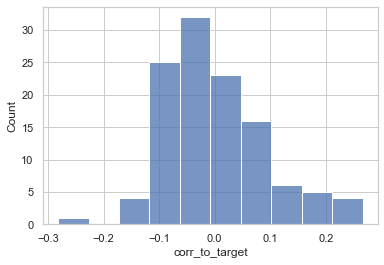

In [32]:
sns.histplot(univariate_summary['corr_to_target'])

<Axes: xlabel='max_minus_min', ylabel='Count'>

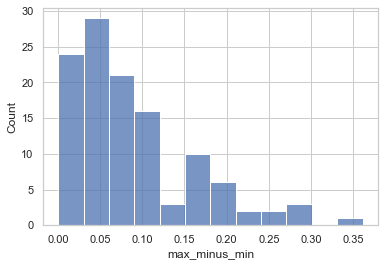

In [44]:
sns.histplot(univariate_summary['max_minus_min'])

In [69]:
univariate_summary = univariate_stats.merge(null_value_tot, left_on='feature', right_on='feature', how = 'left')
univariate_summary.sort_values(by = 'std', ascending=False)

,feature,corr,corr_abs,std,min,max,unique_values,target,max_minus_min,num_nulls,pct_null
82,seen_mental_health_professional,-0.281615,0.281615,0.197384,0.069421,0.348564,2,MDD,0.279143,3,0.000388
9,difficult_doing_daytoday_tasks,0.251297,0.251297,0.153630,0.074218,0.435644,4,MDD,0.361426,2106,0.272058
1,feeling_down_depressed_hopeless,0.266087,0.266087,0.124548,0.050074,0.351097,4,MDD,0.301024,70,0.009043
8,thoughts_you_would_be_better_off_dead,0.123574,0.123574,0.115184,0.088590,0.355556,4,MDD,0.266965,67,0.008655
5,feeling_bad_about_yourself,0.220417,0.220417,0.106486,0.065326,0.324324,4,MDD,0.258998,68,0.008784
6,trouble_concentrating,0.203917,0.203917,0.093549,0.067895,0.287926,4,MDD,0.220030,63,0.008138
3,feeling_tired_or_having_little_energy,0.225408,0.225408,0.092219,0.041215,0.257492,4,MDD,0.216277,64,0.008268
4,poor_appetitie_or_overeating,0.184182,0.184182,0.082427,0.064676,0.263048,4,MDD,0.198372,64,0.008268
0,little_interest_in_doing_things,0.197702,0.197702,0.082044,0.059163,0.258706,4,MDD,0.199544,70,0.009043
28,coronary_heart_disease,-0.067706,0.067706,0.081501,0.093073,0.208333,2,MDD,0.115260,23,0.002971


In [70]:
univariate_summary.sort_values(by = 'corr_abs', ascending=False)

,feature,corr,corr_abs,std,min,max,unique_values,target,max_minus_min,num_nulls,pct_null
82,seen_mental_health_professional,-0.281615,0.281615,0.197384,0.069421,0.348564,2,MDD,0.279143,3,0.000388
1,feeling_down_depressed_hopeless,0.266087,0.266087,0.124548,0.050074,0.351097,4,MDD,0.301024,70,0.009043
9,difficult_doing_daytoday_tasks,0.251297,0.251297,0.153630,0.074218,0.435644,4,MDD,0.361426,2106,0.272058
3,feeling_tired_or_having_little_energy,0.225408,0.225408,0.092219,0.041215,0.257492,4,MDD,0.216277,64,0.008268
5,feeling_bad_about_yourself,0.220417,0.220417,0.106486,0.065326,0.324324,4,MDD,0.258998,68,0.008784
6,trouble_concentrating,0.203917,0.203917,0.093549,0.067895,0.287926,4,MDD,0.220030,63,0.008138
0,little_interest_in_doing_things,0.197702,0.197702,0.082044,0.059163,0.258706,4,MDD,0.199544,70,0.009043
4,poor_appetitie_or_overeating,0.184182,0.184182,0.082427,0.064676,0.263048,4,MDD,0.198372,64,0.008268
2,trouble_falling_or_staying_asleep,0.174241,0.174241,0.066556,0.059644,0.210651,4,MDD,0.151007,66,0.008526
83,count_days_seen_doctor_12mo,0.171175,0.171175,0.065676,0.098901,0.276596,6,MDD,0.177695,6858,0.885932


In [72]:
#univariate_summary[univariate_summary['feature'] == 'weight_lbs_over_height_in_ratio']

In [71]:
#univariate_values[univariate_values['feature'] == 'weight_lbs_over_height_in_ratio']

## Look at stats by theme

In [73]:
def create_theme_col(value):
    if value in dep_screener_cols:
        return 'dep_screener'
    elif value in alcohol_n_smoking_cols:
        return 'alcohol_n_smoking'
    elif value in med_condition_cols:
        return 'med_condition'
    elif value in lifestyle_cols:
        return 'lifestyle'
    elif value in socioeconomic_cols:
        return 'socioeconomic'
    elif value in reproductive_health_cols:
        return 'reproductive_health'
    elif value in demographic_cols:
        return 'demographic'    
    
univariate_summary['feature_theme'] = univariate_summary['feature'].map(create_theme_col)    

In [100]:
univariate_summary.groupby(['feature_theme']).agg('count')

,feature,corr,corr_abs,std,min,max,unique_values,target,max_minus_min,num_nulls,pct_null
feature_theme,,,,,,,,,,,
alcohol_n_smoking,12,12,12,11,12,12,12,12,12,12,12
demographic,10,10,10,10,10,10,10,10,10,10,10
dep_screener,10,10,10,10,10,10,10,10,10,10,10
lifestyle,17,17,17,17,17,17,17,17,17,17,17
med_condition,37,37,37,37,37,37,37,37,37,37,37
reproductive_health,14,14,14,14,14,14,14,14,14,14,14
socioeconomic,17,16,16,16,17,17,17,17,17,17,17


In [95]:
stat_cols = ['corr_abs','min','max','max_minus_min','pct_null']

In [106]:
def create_summary(aggregation_method = 'mean'):

    summary_by_theme = univariate_summary.groupby(['feature_theme'])[stat_cols] \
        .agg(aggregation_method) \
        .reset_index() 

    summary_by_theme['num_features'] = list(univariate_summary.groupby(['feature_theme'])['feature'].count())
    return summary_by_theme.sort_values(by = 'corr_abs', ascending=False)

In [105]:
create_summary(aggregation_method = 'mean')

,feature_theme,corr_abs,min,max,max_minus_min,pct_null,num_features
2,dep_screener,0.199110,0.065171,0.302117,0.236946,0.034918,10
6,socioeconomic,0.080952,0.060635,0.141297,0.080662,0.365502,17
4,med_condition,0.069241,0.081455,0.157108,0.075653,0.258431,37
0,alcohol_n_smoking,0.054075,0.076371,0.150898,0.074528,0.526461,12
1,demographic,0.053226,0.062404,0.133207,0.070803,0.100026,10
3,lifestyle,0.043028,0.071992,0.145151,0.073159,0.272263,17
5,reproductive_health,0.038071,0.061459,0.120253,0.058794,0.306097,14


In [104]:
create_summary(aggregation_method = 'median')

,feature_theme,corr_abs,min,max,max_minus_min,pct_null,num_features
2,dep_screener,0.200810,0.065001,0.282328,0.218154,0.008591,10
6,socioeconomic,0.074196,0.069421,0.109063,0.047984,0.160832,17
4,med_condition,0.068000,0.088121,0.145414,0.061160,0.039013,37
1,demographic,0.056889,0.074892,0.116865,0.067127,0.035913,10
5,reproductive_health,0.032181,0.066374,0.120500,0.045460,0.326960,14
0,alcohol_n_smoking,0.029993,0.070599,0.148729,0.065621,0.616587,12
3,lifestyle,0.024879,0.077392,0.117647,0.064798,0.283684,17


In [103]:
create_summary(aggregation_method = 'max')

,feature_theme,corr_abs,min,max,max_minus_min,pct_null,num_features
6,socioeconomic,0.281615,0.099150,0.348564,0.279143,0.956724,17
2,dep_screener,0.266087,0.088590,0.435644,0.361426,0.272058,10
0,alcohol_n_smoking,0.164896,0.150000,0.191126,0.145455,0.979460,12
4,med_condition,0.162268,0.125000,0.309524,0.277266,0.618396,37
3,lifestyle,0.112602,0.111031,0.254237,0.196429,0.731688,17
1,demographic,0.108059,0.104563,0.175074,0.153226,0.526935,10
5,reproductive_health,0.105222,0.085106,0.240000,0.170556,0.927529,14


<Axes: xlabel='corr_abs', ylabel='max_minus_min'>

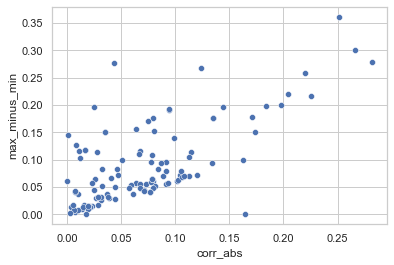

In [109]:
univariate_summary

sns.scatterplot(data=univariate_summary, x='corr_abs', y='max_minus_min')